# Import Libaries

In [5]:
from glob import glob
from pathlib import Path
import numpy as np
import pandas as pd
import os
import warnings
import shutil
import datetime

####PRESTO
from openpyxl import load_workbook
from openpyxl import utils as xl_u
import time
from datetime import date, timedelta
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
import win32com.client
import unicodecsv as csv
import os, os.path
import requests
import sys
import logging
import jaydebeapi as jdbc
import gspread
import gspread_dataframe as gd
from oauth2client.service_account import ServiceAccountCredentials
import math
from jaydebeapi import _DEFAULT_CONVERTERS
from pytz import timezone
import csv
from time import sleep,perf_counter
import dateutil
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt
import statsmodels.api as sm

####sqlalchemy
from sqlalchemy import *
from sqlalchemy.engine import create_engine
from sqlalchemy.schema import *



# ignore all stupid warnings
warnings.filterwarnings('ignore')

### VISUALIZATION ###

import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import numpy as np
from textwrap import wrap
from matplotlib.pyplot import figure
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

In [ ]:
data = pd.read_csv('data_2021-08-17.csv')

# Data Pre-processing

In [ ]:
data['state_city'] = data['state'].map(str) + '_' + data['city'].map(str)
data = data.drop(['state', 'city'], axis = 1)
data.fillna({'state_city':'NA', 'age_group':'NA', 'gender':'NA'}, inplace=True)

In [ ]:
data = data.set_index('user_id').fillna(0)

In [ ]:
data[['state','city','age_group','gender']] = data[['state','city','age_group','gender']].astype('category')

In [ ]:
### FIND CATEGORICAL COLUMNS ###

idx = data.select_dtypes('category').columns

cat_idx = [data.columns.get_loc(col) for col in idx]

In [ ]:
cat_idx

In [ ]:
data.info(verbose=True)

In [ ]:
# generating one row 
data2 = data.sample(frac =.10)
data2.to_csv('random_sampling_10perc_v5.csv')

# Visualization (Full Dataset)

In [6]:
df = pd.read_csv(r"data_2021-08-17.csv")
#replace NaN with zeros
df.fillna(0,inplace=True,downcast='infer')
n = len(df)
seaborn.set()

# Univariate Testing of Categorical Data

# Gender Distribution

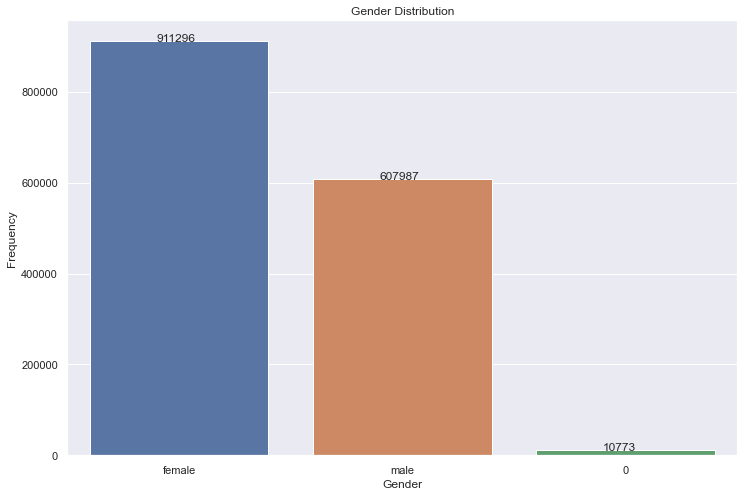

In [7]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="gender", data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+50))

# Age Group Distribution

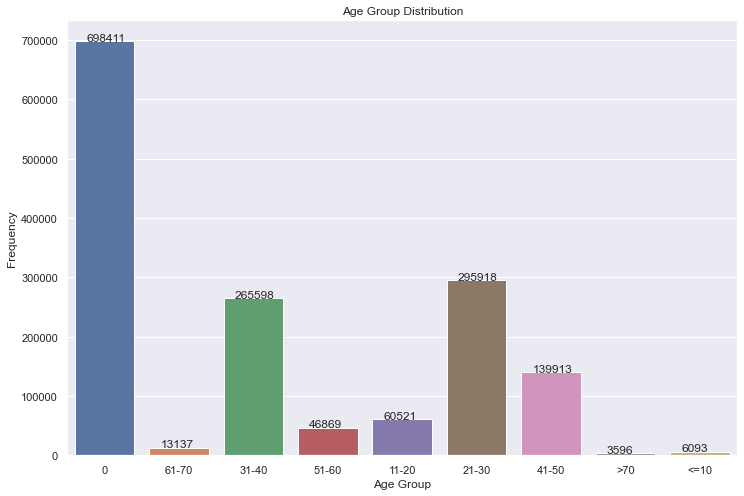

In [8]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="age_group", data=df)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Frequency')

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+50))

# Top 20 City Distribution

In [9]:
data8 = df
count_freq = dict(data8["city"].value_counts())
dict_items = count_freq.items()
print(list(dict_items)[:10])
data8["count_freq"] = data8["city"]
data8["count_freq"] = data8['count_freq'].map(count_freq)
data8 = data8[df.count_freq>2542]

[('Johor Bahru', 72531), ('Petaling Jaya', 57592), ('Kuching', 43314), ('Klang', 40168), ('Puchong', 40106), ('Cheras', 40013), ('Ipoh', 36717), ('Others', 27402), ('Kepong', 25884), ('Kota Kinabalu', 25421)]


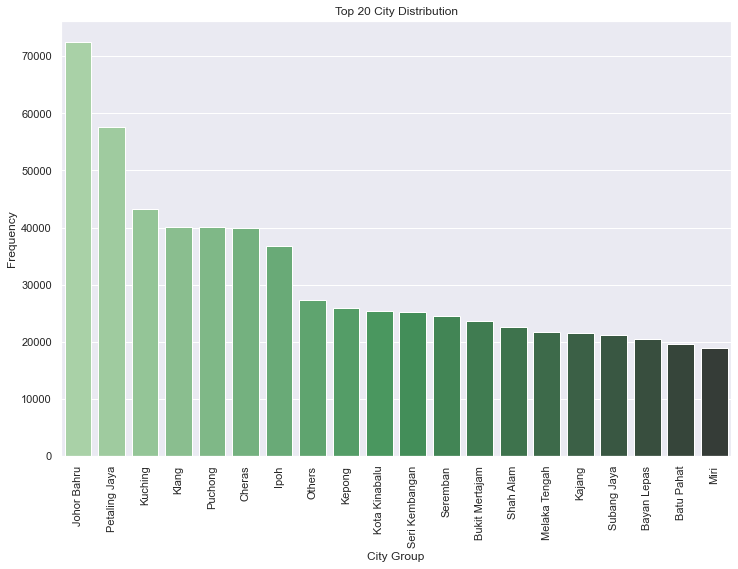

In [10]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="city", data=df, palette="Greens_d",order=df.city.value_counts().iloc[:20].index)
plt.title('Top 20 City Distribution')
plt.xlabel('City Group')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

# State Distribution

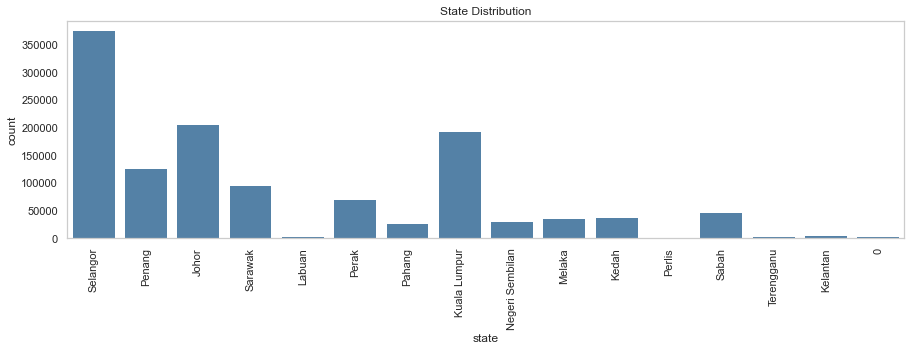

In [11]:
sns.set(color_codes = 'Blue', style="whitegrid")
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context(rc = {'patch.linewidth': 0.0})
fig = plt.subplots(figsize=(15,4))
sns.countplot(x='state', data=data8, color = 'steelblue') # countplot
plt.title('State Distribution')
plt.xticks(rotation='vertical')
plt.show()

# Univariate Testing of Numerical Data 

In [12]:
data3 = df[df['latest_wallet_balance']<=100]
data4 = df[df['time_between_purchase']<=50]
data5 = df[df['login_count']<=1000]
data6 = df[df['microsite_collect_coin']<=1000]

In [13]:
data7 = df[(df['pay_BT']<=100) & (df['pay_7_11']<=100) & (df['pay_kk_mart']<=100) & (df['pay_MOL_unpaid']<=100)
             & (df['pay_CC']<=100) & (df['pay_CC_inst']<=100) & (df['pay_online']<=100) 
             & (df['pay_spay_wallet']<=100) & (df['pay_COD']<=100) & (df['pay_spay_later']<=100)&(df['pay_m2u']<=100)]
data7

,user_id,state,city,age_group,gender,buying_frequency,buy_Mall_ST,buy_Mall_MT,buy_Mall_LT,buy_MP_ST,...,game_guesswinner,game_luckybox,game_luckywheel,game_monopoly,game_puzzlebobble,game_quest,game_shake,time_between_purchase,login_count,count_freq
0,181232684,Selangor,Balakong,0,female,12,2,0,0,5,...,0,0,20,0,0,0,0,3,136,4793
1,161670721,Selangor,Petaling Jaya,61-70,female,19,3,1,0,7,...,0,0,0,0,0,0,0,1,72,57592
2,209500964,Selangor,Jenjarom,0,female,2,0,0,0,1,...,0,0,0,0,0,0,0,0,7,2740
3,109570490,Penang,Bayan Lepas,61-70,male,9,0,0,0,2,...,0,0,0,0,0,0,0,4,277,20457
4,31264438,Penang,Perai,31-40,female,5,1,0,0,2,...,0,1,18,0,0,0,5,6,90,3195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530051,262494839,Melaka,Melaka Tengah,21-30,male,3,0,0,0,1,...,0,0,3,0,0,0,0,19,71,21714
1530052,34685152,Perak,Ipoh,31-40,female,9,1,0,0,2,...,0,0,0,3,0,0,0,5,145,36717
1530053,91623522,Johor,Muar,0,female,1,0,0,0,0,...,0,0,0,0,0,0,0,0,31,15862
1530054,493635597,Kuala Lumpur,Kuala Lumpur,11-20,female,5,0,0,0,2,...,0,0,0,0,0,0,0,0,87,10231


# Latest Wallet Balance

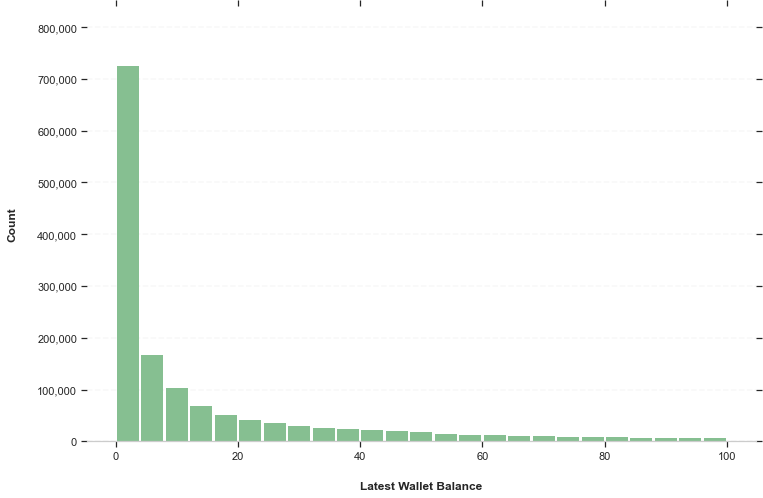

In [14]:
ax = data3.hist(column='latest_wallet_balance', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Latest Wallet Balance", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

# Time Between Purchase

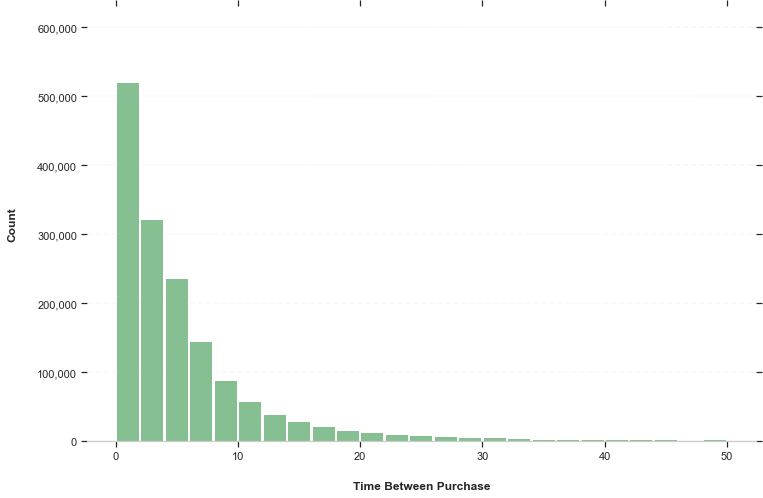

In [15]:
ax = data4.hist(column='time_between_purchase', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Time Between Purchase", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

# Total Login Count

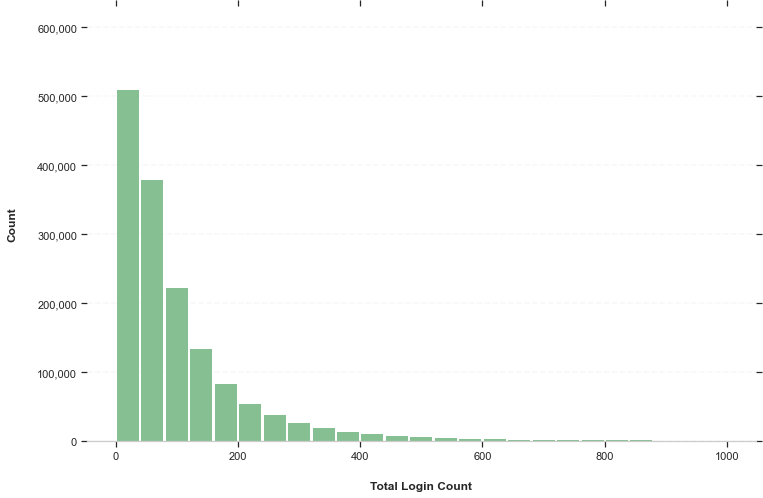

In [16]:
ax = data5.hist(column='login_count', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Total Login Count", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

# Microsite Collect Coin

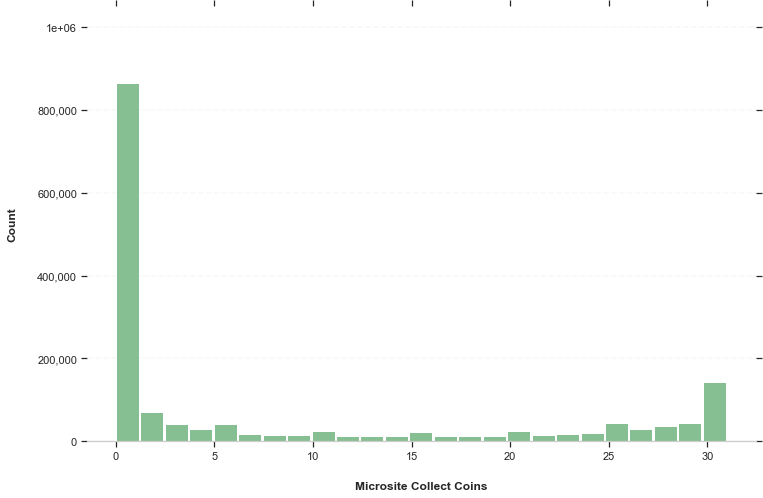

In [17]:
ax = df.hist(column='microsite_collect_coin', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Microsite Collect Coins", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

# Payment Channel

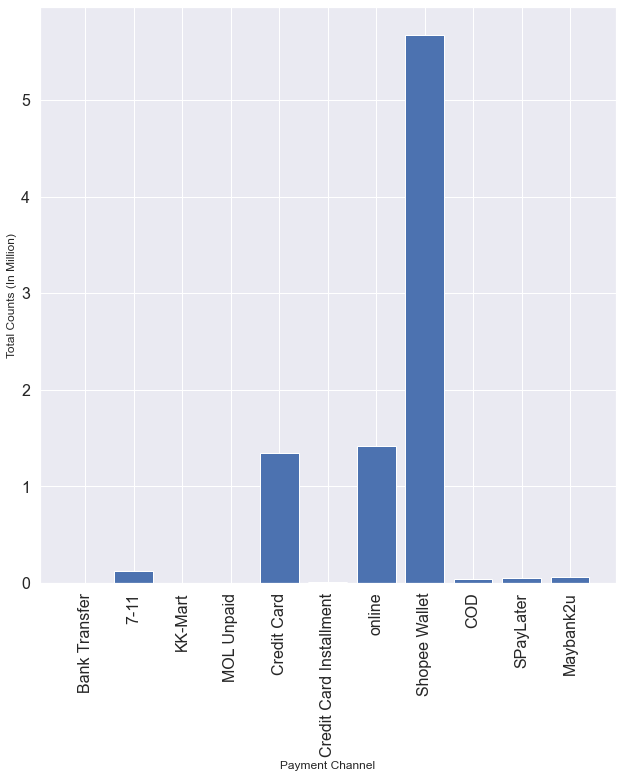

In [18]:
seaborn.set()

payment_channels = ["Bank Transfer","7-11", "KK-Mart", "MOL Unpaid", "Credit Card", "Credit Card Installment", "online", "Shopee Wallet", "COD", "SPayLater", "Maybank2u"]
payment_channels = ["\n".join(wrap(l,62)) for l in payment_channels]
payment_channels_value = []

for i in range(63,74):
    payment_channels_value.append(df[df.columns[i]].sum())

payment_channels_valuess = [i/1e6 for i in payment_channels_value]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_xlabel("Payment Channel")
ax.set_ylabel("Total Counts (In Million)")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.bar(payment_channels,payment_channels_valuess)
plt.xticks(rotation='vertical')
plt.show()

# Seller Tier

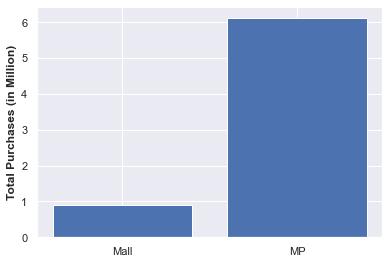

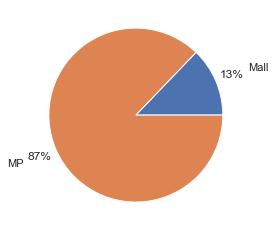

In [19]:
Mall_Buy = 0
MP_Buy = 0

for i in range(6,9):
    Mall_Buy += df[df.columns[i]].sum()  
    MP_Buy += df[df.columns[i+3]].sum()
    
seller_tier = ["Mall","MP"]
seller_tier_value = [Mall_Buy,MP_Buy]
seller_tier_value = [i/1e6 for i in seller_tier_value]
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_ylabel("Total Purchases (in Million)",fontweight='bold')
ax.bar(seller_tier,seller_tier_value)
plt.show()

plt.pie(seller_tier_value,labels=seller_tier,autopct='%1.0f%%',pctdistance=1.2, labeldistance=1.4)
plt.show()

# Electronics

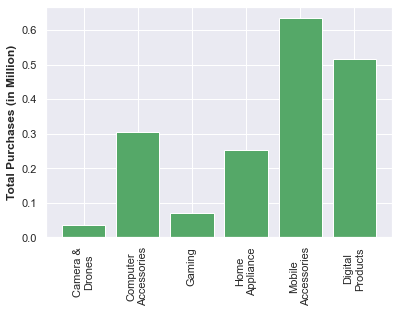

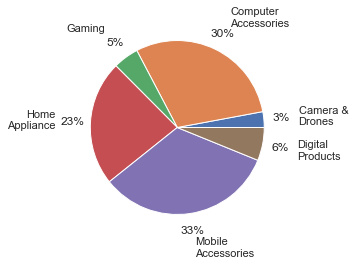

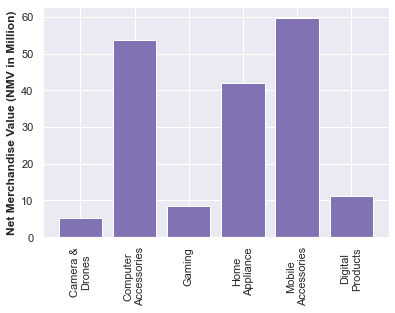

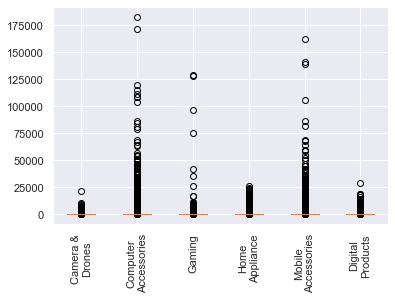

In [20]:
Electronics = ["Camera & Drones","Computer Accessories","Gaming","Home Appliance","Mobile Accessories","Digital Products"]
Electronics = ["\n".join(wrap(l,12)) for l in Electronics]
Electronics_value = []

for i in range(12,17):
    Electronics_value.append(df[df.columns[i]].sum())
    
# Digital Products
Electronics_value.append(df[df.columns[76]].sum())

Electronics_value = [i/1e6 for i in Electronics_value]

fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_ylabel("Total Purchases (in Million)",fontweight="bold")
ax.bar(Electronics,Electronics_value,color='g')
plt.xticks(rotation='vertical')
plt.show()

Electronics_value.clear()
Data = []

for i in range(35,40):
    Electronics_value.append(df[df.columns[i]].sum())
    Data.append(list(df[df.columns[i]]))
    
Electronics_value.append(df[df.columns[77]].sum())
Data.append(list(df[df.columns[77]]))

plt.pie(Electronics_value,labels=Electronics,autopct='%1.0f%%',pctdistance=1.2, labeldistance=1.4)
plt.show()

Electronics_value = [i/1e6 for i in Electronics_value]

fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_ylabel("Net Merchandise Value (NMV in Million)",fontweight="bold")
ax.bar(Electronics,Electronics_value,color='m')
plt.xticks(rotation='vertical')
plt.show()

plt.boxplot(Data,labels=Electronics)
plt.xticks(rotation='vertical')
plt.show()

# Fashion

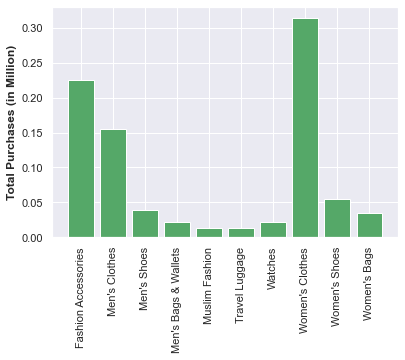

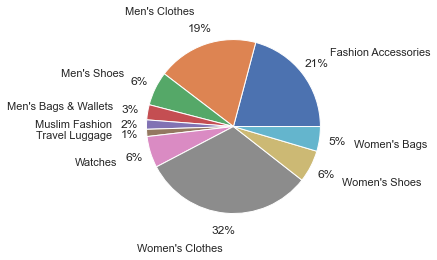

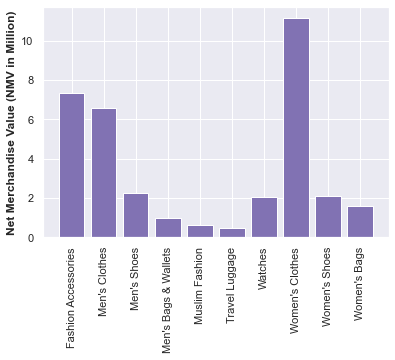

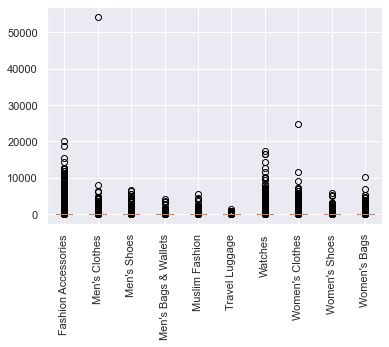

In [21]:
Fashion = ["Fashion Accessories","Men's Clothes","Men's Shoes","Men's Bags & Wallets","Muslim Fashion","Travel Luggage","Watches","Women's Clothes","Women's Shoes","Women's Bags"]
Fashion_value = []

for i in range(17,27):
    Fashion_value.append(df[df.columns[i]].sum())
    
Fashion_value = [i/1e6 for i in Fashion_value]    
    
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_ylabel("Total Purchases (in Million)",fontweight="bold")
ax.bar(Fashion,Fashion_value,color = 'g')
plt.xticks(rotation='vertical')
plt.show()

Fashion_value.clear()
Data.clear()

for i in range(40,50):
    Fashion_value.append(df[df.columns[i]].sum())
    Data.append(list(df[df.columns[i]]))

Fashion = ["Fashion Accessories","Men's Clothes","Men's Shoes","Men's Bags & Wallets","Muslim Fashion","Travel Luggage","Watches","Women's Clothes","Women's Shoes","Women's Bags"]
plt.pie(Fashion_value,labels=Fashion,autopct='%1.0f%%',pctdistance=1.2, labeldistance=1.4)
plt.show()
    
Fashion_value = [i/1e6 for i in Fashion_value]
    
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_ylabel("Net Merchandise Value (NMV in Million)",fontweight="bold")
ax.bar(Fashion,Fashion_value,color='m')
plt.xticks(rotation='vertical')
plt.show()

plt.boxplot(Data,labels=Fashion)
plt.xticks(rotation='vertical')
plt.show()

# FMCG

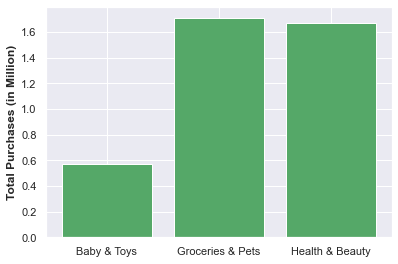

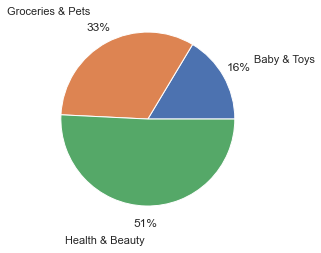

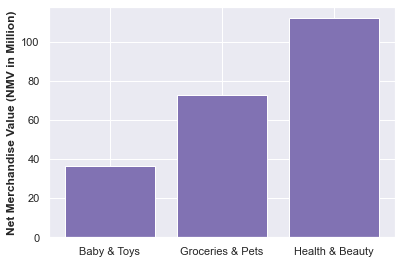

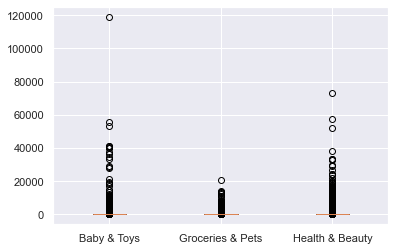

In [22]:
FMCG = ["Baby & Toys","Groceries & Pets","Health & Beauty"]
FMCG_value = []

for i in range(27,30):
    FMCG_value.append(df[df.columns[i]].sum())
    
FMCG_value = [i/1e6 for i in FMCG_value]
    
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_ylabel("Total Purchases (in Million)",fontweight="bold")
ax.bar(FMCG,FMCG_value,color='g')
plt.show()

FMCG_value.clear()
Data.clear()

for i in range(50,53):
    FMCG_value.append(df[df.columns[i]].sum())
    Data.append(list(df[df.columns[i]]))
    
plt.pie(FMCG_value,labels=FMCG,autopct='%1.0f%%',pctdistance=1.2, labeldistance=1.4)
plt.show()
    
FMCG_value = [i/1e6 for i in FMCG_value]
    
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_ylabel("Net Merchandise Value (NMV in Million)",fontweight="bold")
ax.bar(FMCG,FMCG_value,color='m')
plt.show()

plt.boxplot(Data,labels=FMCG)
plt.show()


# Lifestyle

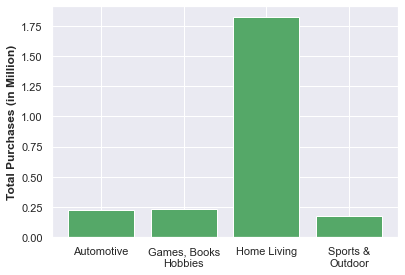

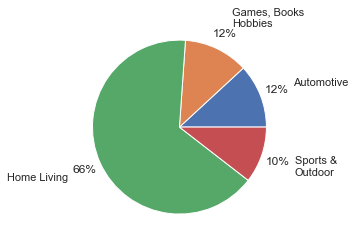

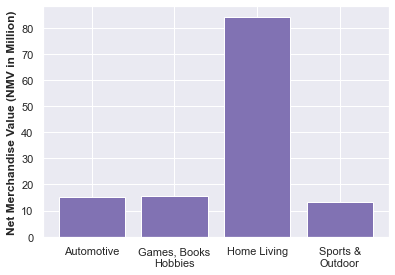

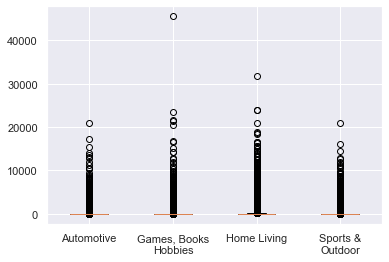

In [23]:
Lifestyle = ["Automotive","Games, Books Hobbies","Home Living","Sports & Outdoor"]
Lifestyle = ["\n".join(wrap(l,12)) for l in Lifestyle]
Lifestyle_value = []

for i in range(30,34):
    Lifestyle_value.append(df[df.columns[i]].sum()) 
    
Lifestyle_value = [i/1e6 for i in Lifestyle_value]

fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_ylabel("Total Purchases (in Million)",fontweight="bold")
ax.bar(Lifestyle,Lifestyle_value,color='g')
plt.show()

Lifestyle_value.clear()
Data.clear()

for i in range(53,57):
    Lifestyle_value.append(df[df.columns[i]].sum())
    Data.append(list(df[df.columns[i]]))
    
plt.pie(Lifestyle_value,labels=Lifestyle,autopct='%1.0f%%',pctdistance=1.2, labeldistance=1.4)
plt.show()

Lifestyle_value = [i/1e6 for i in Lifestyle_value]
    
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_ylabel("Net Merchandise Value (NMV in Million)",fontweight="bold")
ax.bar(Lifestyle,Lifestyle_value,color='m')
plt.show()

plt.boxplot(Data,labels=Lifestyle)
plt.show()

# Cluster Performance

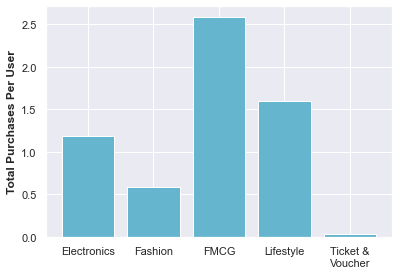

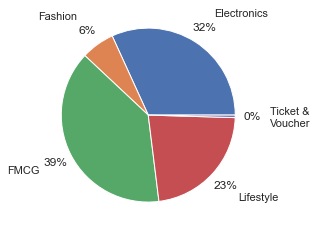

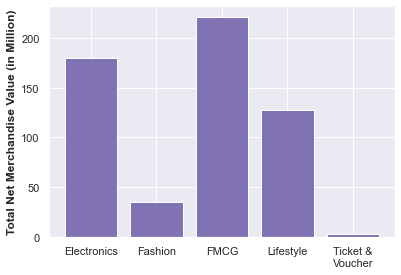

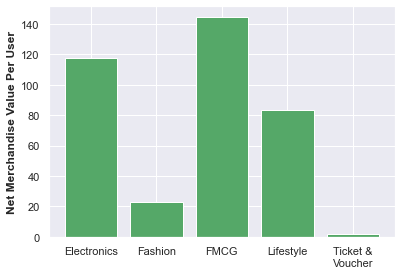

In [24]:
Cluster = ["Electronics","Fashion","FMCG","Lifestyle","Ticket & Voucher"]
Cluster = ["\n".join(wrap(l,12)) for l in Cluster]
Cluster_Value = []

Cluster_Value.append(sum([df[df.columns[i]].sum() for i in range(12,17)])+df[df.columns[76]].sum())
Cluster_Value.append(sum([df[df.columns[i]].sum() for i in range(17,27)]))
Cluster_Value.append(sum([df[df.columns[i]].sum() for i in range(27,30)]))
Cluster_Value.append(sum([df[df.columns[i]].sum() for i in range(30,34)]))
Cluster_Value.append(df[df.columns[34]].sum())

Cluster_Value = [i/n for i in Cluster_Value]

fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_ylabel("Total Purchases Per User",fontweight="bold")
ax.bar(Cluster,Cluster_Value,color='c')
plt.show()

Cluster_Value.clear()
Cluster_Value.append(sum(Electronics_value))
Cluster_Value.append(sum(Fashion_value))
Cluster_Value.append(sum(FMCG_value))
Cluster_Value.append(sum(Lifestyle_value))
Cluster_Value.append(df[df.columns[57]].sum()/1e6)

plt.pie(Cluster_Value,labels=Cluster,autopct='%1.0f%%',pctdistance=1.2, labeldistance=1.4)
plt.show()

fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_ylabel("Total Net Merchandise Value (in Million)",fontweight="bold")
ax.bar(Cluster,Cluster_Value,color='m')
plt.show()

Cluster_Value = [i/n*1e6 for i in Cluster_Value]

fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_ylabel("Net Merchandise Value Per User",fontweight="bold")
ax.bar(Cluster,Cluster_Value,color='g')
plt.show()

# Peak Day

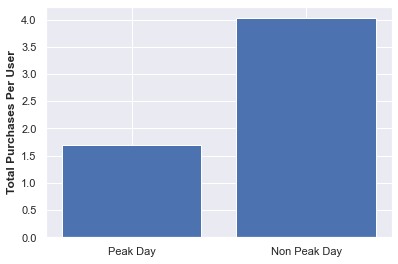

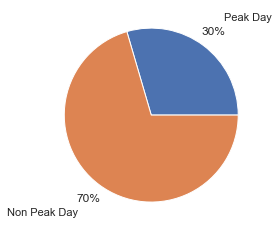

In [25]:
Peak_Day = 0
Non_Peak_Day = 0

for i in range(74,75):
    Peak_Day += df[df.columns[i]].sum()  
    Non_Peak_Day += df[df.columns[i+1]].sum()
    
peak = ["Peak Day","Non Peak Day"]
peak_value = [Peak_Day,Non_Peak_Day]
peak_value = [i/n for i in peak_value]
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_ylabel("Total Purchases Per User",fontweight="bold")
ax.bar(peak,peak_value)
plt.show()

plt.pie(peak_value,labels=peak,autopct='%1.0f%%',pctdistance=1.2, labeldistance=1.4)
plt.show()

# Free Shipping Voucher Usage

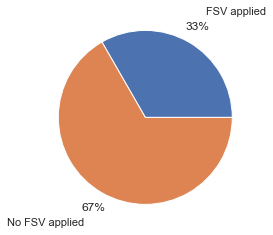

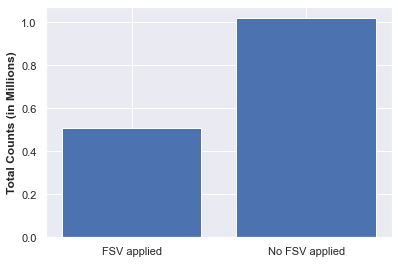

FSV Applied Per User:8


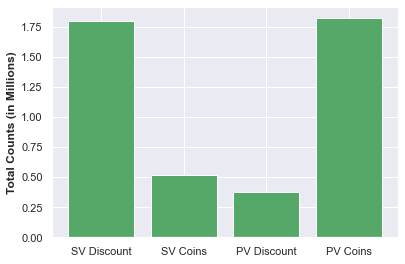

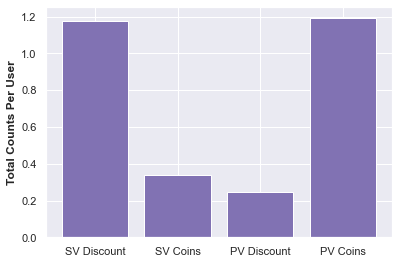

In [26]:
free_shipping_count = (df["fsv_usage"]==0).sum()
non_free_shipping_count = len(df) - free_shipping_count
free_shipping = ["FSV applied","No FSV applied"]
free_shipping_value = [free_shipping_count,non_free_shipping_count]

plt.pie(free_shipping_value,labels=free_shipping,autopct='%1.0f%%',pctdistance=1.2, labeldistance=1.4)
plt.show()

free_shipping_value = [i/1e6 for i in free_shipping_value]
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_ylabel("Total Counts (in Millions)",fontweight="bold")
ax.bar(free_shipping,free_shipping_value)
plt.show()

print("FSV Applied Per User:"+str(df["fsv_usage"].sum()//free_shipping_count))

usage = ["SV Discount","SV Coins","PV Discount","PV Coins"]
usage_value = []
for i in range(59,63):
    usage_value.append(df[df.columns[i]].sum())
    
usage_value = [i/1e6 for i in usage_value]
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_ylabel("Total Counts (in Millions)",fontweight="bold")
ax.bar(usage,usage_value,color='g')
plt.show()

usage_value = [i/n*1e6 for i in usage_value]
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_ylabel("Total Counts Per User",fontweight="bold")
ax.bar(usage,usage_value,color='m')
plt.show()

# Games

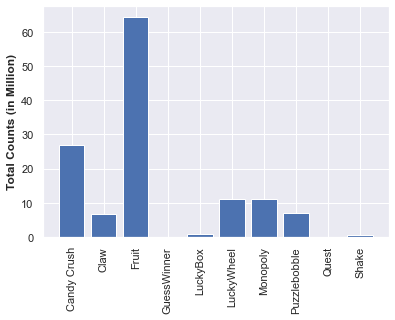

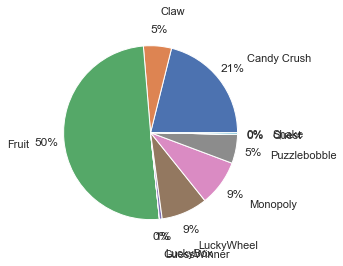

In [27]:
Games = ["Candy Crush","Claw","Fruit","GuessWinner","LuckyBox","LuckyWheel","Monopoly","Puzzlebobble","Quest","Shake"]
Games_value = []

for i in range(80,90):
    Games_value.append(df[df.columns[i]].sum())
    
Games_value = [i/1e6 for i in Games_value]

fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_ylabel("Total Counts (in Million)",fontweight="bold")
ax.bar(Games,Games_value)
plt.xticks(rotation='vertical')
plt.show()

plt.pie(Games_value,labels=Games,autopct='%1.0f%%',pctdistance=1.2, labeldistance=1.4)
plt.show()

# Bivariate Analysis

# Gender Purchasing Power vs Item Cluster (Orders)

In [28]:
# ELECTRONICS
electronics_df = df[(df.orders_cameras_drones>0) | (df.orders_computer_acc>0) | (df.orders_gaming>0) | (df.orders_HA>0) | (df.orders_mobile_acc>0) | (df.orders_DP>0)]
electronics_male_df = electronics_df[electronics_df.gender=="male"]
electronics_female_df = electronics_df[electronics_df.gender=="female"]
electronics_NA_df = electronics_df[electronics_df.gender==0]

# FASHION
fashion_df = df[(df.orders_FA>0) | (df.orders_men_clothes>0) | (df.orders_men_shoes>0) | (df.orders_men_bag_wallet>0) | (df.orders_muslim_fashion>0) | (df.orders_travel_luggage>0) | (df.orders_watches>0) | (df.orders_women_clothes>0) | (df.orders_women_shoes>0) | (df.orders_women_bags>0)]
fashion_male_df = fashion_df[fashion_df.gender=="male"]
fashion_female_df = fashion_df[fashion_df.gender=="female"]
fashion_NA_df = fashion_df[fashion_df.gender==0]

# FMCG
FMCG_df = df[(df.orders_baby_toys>0) | (df.orders_GP>0) | (df.orders_HB>0)]
FMCG_male_df = FMCG_df[FMCG_df.gender=="male"]
FMCG_female_df = FMCG_df[FMCG_df.gender=="female"]
FMCG_NA_df = FMCG_df[FMCG_df.gender==0]

# FMCG
Lifestyle_df = df[(df.orders_auto>0) | (df.orders_GBH>0) | (df.orders_HL>0) | (df.orders_sports_outdoor>0)]
Lifestyle_male_df = Lifestyle_df[Lifestyle_df.gender=="male"]
Lifestyle_female_df = Lifestyle_df[Lifestyle_df.gender=="female"]
Lifestyle_NA_df = Lifestyle_df[Lifestyle_df.gender==0]

# Tickets & Vouchers
TV_df = df[(df.orders_ticket_voucher>0)]
TV_male_df = TV_df[TV_df.gender=="male"]
TV_female_df = TV_df[TV_df.gender=="female"]
TV_NA_df = TV_df[TV_df.gender==0]

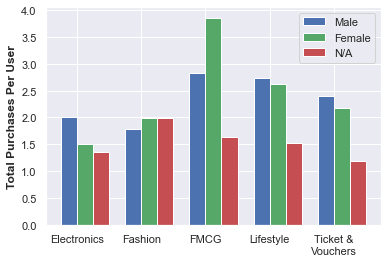

In [29]:
width = 0.25
r = np.arange(5)

male,female,NA = 0,0,0

for i in range(12,17):
    male += electronics_male_df[electronics_male_df.columns[i]].sum()
    female += electronics_female_df[electronics_female_df.columns[i]].sum()
    NA += electronics_NA_df[electronics_NA_df.columns[i]].sum()

electronics_male_per_orders = male/len(electronics_male_df)
electronics_female_per_orders = female/len(electronics_female_df)
electronics_NA_per_orders = NA/len(electronics_NA_df)

male,female,NA = 0,0,0

for i in range(17,27):
    male += fashion_male_df[fashion_male_df.columns[i]].sum()
    female += fashion_female_df[fashion_female_df.columns[i]].sum()
    NA += fashion_NA_df[fashion_NA_df.columns[i]].sum()

fashion_male_per_orders = male/len(fashion_male_df)
fashion_female_per_orders = female/len(fashion_female_df)
fashion_NA_per_orders = NA/len(fashion_NA_df)

male,female,NA = 0,0,0

for i in range(27,30):
    male += FMCG_male_df[FMCG_male_df.columns[i]].sum()
    female += FMCG_female_df[FMCG_female_df.columns[i]].sum()
    NA += FMCG_NA_df[FMCG_NA_df.columns[i]].sum()

FMCG_male_per_orders = male/len(FMCG_male_df)
FMCG_female_per_orders = female/len(FMCG_female_df)
FMCG_NA_per_orders = NA/len(FMCG_NA_df)

male,female,NA = 0,0,0

for i in range(30,34):
    male += Lifestyle_male_df[Lifestyle_male_df.columns[i]].sum()
    female += Lifestyle_female_df[Lifestyle_female_df.columns[i]].sum()
    NA += Lifestyle_NA_df[Lifestyle_NA_df.columns[i]].sum()

Lifestyle_male_per_orders = male/len(Lifestyle_male_df)
Lifestyle_female_per_orders = female/len(Lifestyle_female_df)
Lifestyle_NA_per_orders = NA/len(Lifestyle_NA_df)

TV_male_per_orders = TV_male_df["orders_ticket_voucher"].sum()/len(TV_male_df)
TV_female_per_orders = TV_female_df["orders_ticket_voucher"].sum()/len(TV_female_df)
TV_NA_per_orders = TV_NA_df["orders_ticket_voucher"].sum()/len(TV_NA_df)

Male = [electronics_male_per_orders,fashion_male_per_orders,FMCG_male_per_orders,Lifestyle_male_per_orders,TV_male_per_orders]
Female = [electronics_female_per_orders,fashion_female_per_orders,FMCG_female_per_orders,Lifestyle_female_per_orders,TV_female_per_orders]
NA = [electronics_NA_per_orders,fashion_NA_per_orders,FMCG_NA_per_orders,Lifestyle_NA_per_orders,TV_NA_per_orders]

plt.bar(r,Male,color='b',width=width,label='Male')
plt.bar(r+width,Female,color='g',width=width,label='Female')
plt.bar(r+2*width,NA,color='r',width=width,label='N/A')

plt.ylabel("Total Purchases Per User",fontweight='bold')
plt.xticks(r + width/2,['Electronics','Fashion','FMCG','Lifestyle',"Ticket &\nVouchers"])
plt.legend()
  
plt.show()

# Gender Purchasing Power VS Item Cluster (NMV)

In [30]:
# ELECTRONICS
electronics_df = df[(df.nmv_cameras_drones>0) | (df.nmv_computer_acc>0) | (df.nmv_gaming>0) | (df.nmv_HA>0) | (df.nmv_mobile_acc>0) | (df.nmv_DP>0)]
electronics_male_df = electronics_df[electronics_df.gender=="male"]
electronics_female_df = electronics_df[electronics_df.gender=="female"]
electronics_NA_df = electronics_df[electronics_df.gender==0]

# FASHION
fashion_df = df[(df.nmv_FA>0) | (df.nmv_men_clothes>0) | (df.nmv_men_shoes>0) | (df.nmv_men_bag_wallet>0) | (df.nmv_muslim_fashion>0) | (df.nmv_travel_luggage>0) | (df.nmv_watches>0) | (df.nmv_women_clothes>0) | (df.nmv_women_shoes>0) | (df.nmv_women_bags>0)]
fashion_male_df = fashion_df[fashion_df.gender=="male"]
fashion_female_df = fashion_df[fashion_df.gender=="female"]
fashion_NA_df = fashion_df[fashion_df.gender==0]

# FMCG
FMCG_df = df[(df.nmv_baby_toys>0) | (df.nmv_GP>0) | (df.nmv_HB>0)]
FMCG_male_df = FMCG_df[FMCG_df.gender=="male"]
FMCG_female_df = FMCG_df[FMCG_df.gender=="female"]
FMCG_NA_df = FMCG_df[FMCG_df.gender==0]

# FMCG
Lifestyle_df = df[(df.nmv_auto>0) | (df.nmv_GBH>0) | (df.nmv_HL>0) | (df.nmv_sports_outdoor>0)]
Lifestyle_male_df = Lifestyle_df[Lifestyle_df.gender=="male"]
Lifestyle_female_df = Lifestyle_df[Lifestyle_df.gender=="female"]
Lifestyle_NA_df = Lifestyle_df[Lifestyle_df.gender==0]

# Tickets & Vouchers
TV_df = df[(df.nmv_ticket_voucher>0)]
TV_male_df = TV_df[TV_df.gender=="male"]
TV_female_df = TV_df[TV_df.gender=="female"]
TV_NA_df = TV_df[TV_df.gender==0]

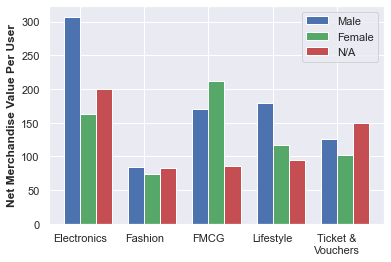

In [31]:
male,female,NA = 0,0,0

for i in range(35,40):
    male += electronics_male_df[electronics_male_df.columns[i]].sum()
    female += electronics_female_df[electronics_female_df.columns[i]].sum()
    NA += electronics_NA_df[electronics_NA_df.columns[i]].sum()

electronics_male_per_orders = male/len(electronics_male_df)
electronics_female_per_orders = female/len(electronics_female_df)
electronics_NA_per_orders = NA/len(electronics_NA_df)

male,female,NA = 0,0,0

for i in range(40,50):
    male += fashion_male_df[fashion_male_df.columns[i]].sum()
    female += fashion_female_df[fashion_female_df.columns[i]].sum()
    NA += fashion_NA_df[fashion_NA_df.columns[i]].sum()

fashion_male_per_orders = male/len(fashion_male_df)
fashion_female_per_orders = female/len(fashion_female_df)
fashion_NA_per_orders = NA/len(fashion_NA_df)

male,female,NA = 0,0,0

for i in range(50,53):
    male += FMCG_male_df[FMCG_male_df.columns[i]].sum()
    female += FMCG_female_df[FMCG_female_df.columns[i]].sum()
    NA += FMCG_NA_df[FMCG_NA_df.columns[i]].sum()

FMCG_male_per_orders = male/len(FMCG_male_df)
FMCG_female_per_orders = female/len(FMCG_female_df)
FMCG_NA_per_orders = NA/len(FMCG_NA_df)

male,female,NA = 0,0,0

for i in range(53,57):
    male += Lifestyle_male_df[Lifestyle_male_df.columns[i]].sum()
    female += Lifestyle_female_df[Lifestyle_female_df.columns[i]].sum()
    NA += Lifestyle_NA_df[Lifestyle_NA_df.columns[i]].sum()

Lifestyle_male_per_orders = male/len(Lifestyle_male_df)
Lifestyle_female_per_orders = female/len(Lifestyle_female_df)
Lifestyle_NA_per_orders = NA/len(Lifestyle_NA_df)

TV_male_per_orders = TV_male_df["nmv_ticket_voucher"].sum()/len(TV_male_df)
TV_female_per_orders = TV_female_df["nmv_ticket_voucher"].sum()/len(TV_female_df)
TV_NA_per_orders = TV_NA_df["nmv_ticket_voucher"].sum()/len(TV_NA_df)

Male = [electronics_male_per_orders,fashion_male_per_orders,FMCG_male_per_orders,Lifestyle_male_per_orders,TV_male_per_orders]
Female = [electronics_female_per_orders,fashion_female_per_orders,FMCG_female_per_orders,Lifestyle_female_per_orders,TV_female_per_orders]
NA = [electronics_NA_per_orders,fashion_NA_per_orders,FMCG_NA_per_orders,Lifestyle_NA_per_orders,TV_NA_per_orders]

plt.bar(r,Male,color='b',width=width,label='Male')
plt.bar(r+width,Female,color='g',width=width,label='Female')
plt.bar(r+2*width,NA,color='r',width=width,label='N/A')

plt.ylabel("Net Merchandise Value Per User",fontweight="bold")
plt.xticks(r + width/2,['Electronics','Fashion','FMCG','Lifestyle',"Ticket &\nVouchers"])
plt.legend()
  
plt.show()

# Gender Distribution VS Item Cluster

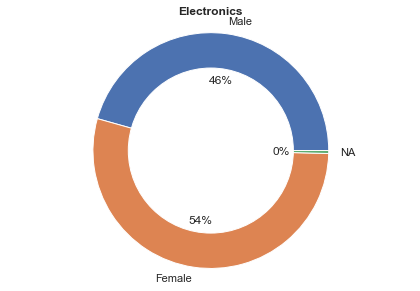

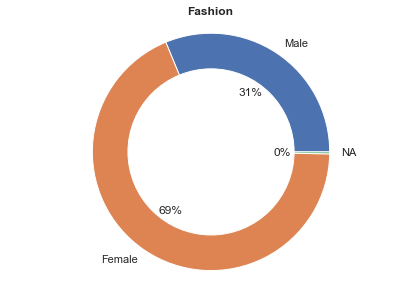

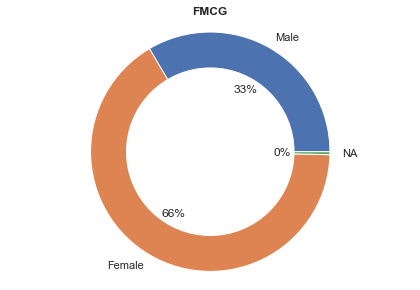

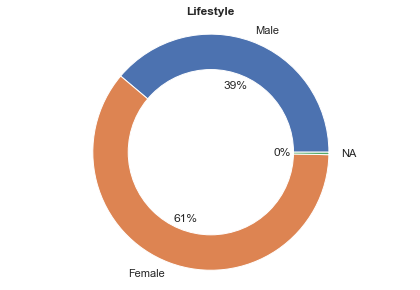

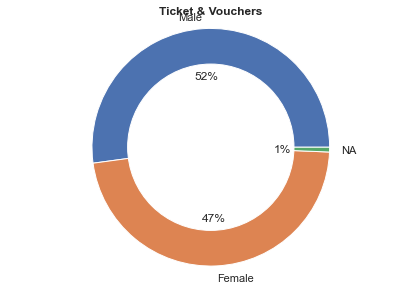

In [32]:
fig,ax = plt.subplots()

ax.pie([len(electronics_male_df),len(electronics_female_df),len(electronics_NA_df)],labels=["Male","Female","NA"],autopct='%1.0f%%')
fig = plt.gcf()
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.axis('equal')  
plt.tight_layout()
plt.title("Electronics",fontweight="bold")
plt.show()

fig,ax = plt.subplots()

ax.pie([len(fashion_male_df),len(fashion_female_df),len(fashion_NA_df)],labels=["Male","Female","NA"],autopct='%1.0f%%')
fig = plt.gcf()
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.axis('equal')  
plt.tight_layout()
plt.title("Fashion",fontweight="bold")
plt.show()

fig,ax = plt.subplots()

ax.pie([len(FMCG_male_df),len(FMCG_female_df),len(FMCG_NA_df)],labels=["Male","Female","NA"],autopct='%1.0f%%')
fig = plt.gcf()
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.axis('equal')  
plt.tight_layout()
plt.title("FMCG",fontweight="bold")
plt.show()

fig,ax = plt.subplots()

ax.pie([len(Lifestyle_male_df),len(Lifestyle_female_df),len(Lifestyle_NA_df)],labels=["Male","Female","NA"],autopct='%1.0f%%')
fig = plt.gcf()
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.axis('equal')  
plt.tight_layout()
plt.title("Lifestyle",fontweight="bold")
plt.show()

fig,ax = plt.subplots()

ax.pie([len(TV_male_df),len(TV_female_df),len(TV_NA_df)],labels=["Male","Female","NA"],autopct='%1.0f%%')
fig = plt.gcf()
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.axis('equal')  
plt.tight_layout()
plt.title("Ticket & Vouchers",fontweight="bold")
plt.show()

# Correlation Analysis (TBD)

In [33]:
dataaa = df[['buying_frequency', 'buy_peak_day', 'buy_non_peak_day']]

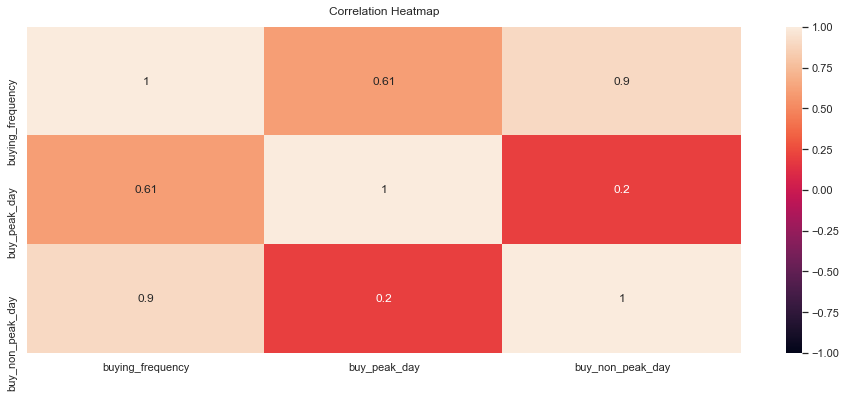

In [34]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(dataaa.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [35]:
df.columns

Index(['user_id', 'state', 'city', 'age_group', 'gender', 'buying_frequency',
       'buy_Mall_ST', 'buy_Mall_MT', 'buy_Mall_LT', 'buy_MP_ST', 'buy_MP_MT',
       'buy_MP_LT', 'orders_cameras_drones', 'orders_computer_acc',
       'orders_gaming', 'orders_HA', 'orders_mobile_acc', 'orders_FA',
       'orders_men_clothes', 'orders_men_shoes', 'orders_men_bag_wallet',
       'orders_muslim_fashion', 'orders_travel_luggage', 'orders_watches',
       'orders_women_clothes', 'orders_women_shoes', 'orders_women_bags',
       'orders_baby_toys', 'orders_GP', 'orders_HB', 'orders_auto',
       'orders_GBH', 'orders_HL', 'orders_sports_outdoor',
       'orders_ticket_voucher', 'nmv_cameras_drones', 'nmv_computer_acc',
       'nmv_gaming', 'nmv_HA', 'nmv_mobile_acc', 'nmv_FA', 'nmv_men_clothes',
       'nmv_men_shoes', 'nmv_men_bag_wallet', 'nmv_muslim_fashion',
       'nmv_travel_luggage', 'nmv_watches', 'nmv_women_clothes',
       'nmv_women_shoes', 'nmv_women_bags', 'nmv_baby_toys', 'nmv_GP',

In [36]:
# ELECTRONICS
electronics_df = df[(df.orders_cameras_drones>0) | (df.orders_computer_acc>0) | (df.orders_gaming>0) | (df.orders_HA>0) | (df.orders_mobile_acc>0) | (df.orders_DP>0)]

# FASHION
fashion_df = df[(df.orders_FA>0) | (df.orders_men_clothes>0) | (df.orders_men_shoes>0) | (df.orders_men_bag_wallet>0) | (df.orders_muslim_fashion>0) | (df.orders_travel_luggage>0) | (df.orders_watches>0) | (df.orders_women_clothes>0) | (df.orders_women_shoes>0) | (df.orders_women_bags>0)]

# FMCG
FMCG_df = df[(df.orders_baby_toys>0) | (df.orders_GP>0) | (df.orders_HB>0)]

# FMCG
Lifestyle_df = df[(df.orders_auto>0) | (df.orders_GBH>0) | (df.orders_HL>0) | (df.orders_sports_outdoor>0)]

# Tickets & Vouchers
TV_df = df[(df.orders_ticket_voucher>0)]

In [37]:
a = electronics_df

In [38]:
frames = [electronics_df, fashion_df, FMCG_df, Lifestyle_df, TV_df]
dataaa_ver2 = pd.concat(frames)
dataaa_ver2

,user_id,state,city,age_group,gender,buying_frequency,buy_Mall_ST,buy_Mall_MT,buy_Mall_LT,buy_MP_ST,...,game_guesswinner,game_luckybox,game_luckywheel,game_monopoly,game_puzzlebobble,game_quest,game_shake,time_between_purchase,login_count,count_freq
0,181232684,Selangor,Balakong,0,female,12,2,0,0,5,...,0,0,20,0,0,0,0,3,136,4793
1,161670721,Selangor,Petaling Jaya,61-70,female,19,3,1,0,7,...,0,0,0,0,0,0,0,1,72,57592
3,109570490,Penang,Bayan Lepas,61-70,male,9,0,0,0,2,...,0,0,0,0,0,0,0,4,277,20457
5,474219514,Selangor,Puchong,51-60,male,17,1,0,0,5,...,0,0,11,3,0,0,0,2,82,40106
6,37255436,Penang,Tanjong Tokong,31-40,female,14,2,2,0,5,...,0,0,0,0,0,0,0,2,143,3716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529717,21242602,Selangor,Petaling Jaya,21-30,female,4,0,0,0,3,...,0,0,0,0,0,0,0,4,151,57592
1529838,251431712,Johor,Johor Bahru,0,male,5,0,0,0,3,...,0,0,0,0,0,0,0,3,38,72531
1529850,122362084,Selangor,Kuala Selangor,11-20,female,9,0,0,0,0,...,0,0,0,0,0,0,0,2,128,3028
1529880,280935396,Selangor,Hulu Langat,11-20,male,3,0,0,0,1,...,0,0,0,0,0,0,0,11,38,15885


In [39]:
# ELECTRONICS
electronics_df = df[(df.orders_cameras_drones>0) | (df.orders_computer_acc>0) | (df.orders_gaming>0) | (df.orders_HA>0) | (df.orders_mobile_acc>0) | (df.orders_DP>0) | (df.buying_frequency>0) | (df.buy_non_peak_day>0) | (df.buy_peak_day>0)]
electronics_male_df = electronics_df[electronics_df.gender=="male"]
electronics_female_df = electronics_df[electronics_df.gender=="female"]
electronics_NA_df = electronics_df[electronics_df.gender==0]

# FASHION
fashion_df = df[(df.orders_FA>0) | (df.orders_men_clothes>0) | (df.orders_men_shoes>0) | (df.orders_men_bag_wallet>0) | (df.orders_muslim_fashion>0) | (df.orders_travel_luggage>0) | (df.orders_watches>0) | (df.orders_women_clothes>0) | (df.orders_women_shoes>0) | (df.orders_women_bags>0)]
fashion_male_df = fashion_df[fashion_df.gender=="male"]
fashion_female_df = fashion_df[fashion_df.gender=="female"]
fashion_NA_df = fashion_df[fashion_df.gender==0]

# FMCG
FMCG_df = df[(df.orders_baby_toys>0) | (df.orders_GP>0) | (df.orders_HB>0)]
FMCG_male_df = FMCG_df[FMCG_df.gender=="male"]
FMCG_female_df = FMCG_df[FMCG_df.gender=="female"]
FMCG_NA_df = FMCG_df[FMCG_df.gender==0]

# FMCG
Lifestyle_df = df[(df.orders_auto>0) | (df.orders_GBH>0) | (df.orders_HL>0) | (df.orders_sports_outdoor>0)]
Lifestyle_male_df = Lifestyle_df[Lifestyle_df.gender=="male"]
Lifestyle_female_df = Lifestyle_df[Lifestyle_df.gender=="female"]
Lifestyle_NA_df = Lifestyle_df[Lifestyle_df.gender==0]

# Tickets & Vouchers
TV_df = df[(df.orders_ticket_voucher>0)]
TV_male_df = TV_df[TV_df.gender=="male"]
TV_female_df = TV_df[TV_df.gender=="female"]
TV_NA_df = TV_df[TV_df.gender==0]

In [40]:
dataaa_ver2 = df[['buying_frequency', 'orders_cameras_drones', 'orders_computer_acc',
                   'orders_gaming', 'orders_HA', 'orders_mobile_acc', 'orders_FA',
                   'orders_men_clothes', 'orders_men_shoes', 'orders_men_bag_wallet',
                   'orders_muslim_fashion', 'orders_travel_luggage', 'orders_watches',
                   'orders_women_clothes', 'orders_women_shoes', 'orders_women_bags',
                   'orders_baby_toys', 'orders_GP', 'orders_HB', 'orders_auto',
                   'orders_GBH', 'orders_HL', 'orders_sports_outdoor',
                   'orders_ticket_voucher', 'orders_DP', 'buy_non_peak_day', 'buy_peak_day']]

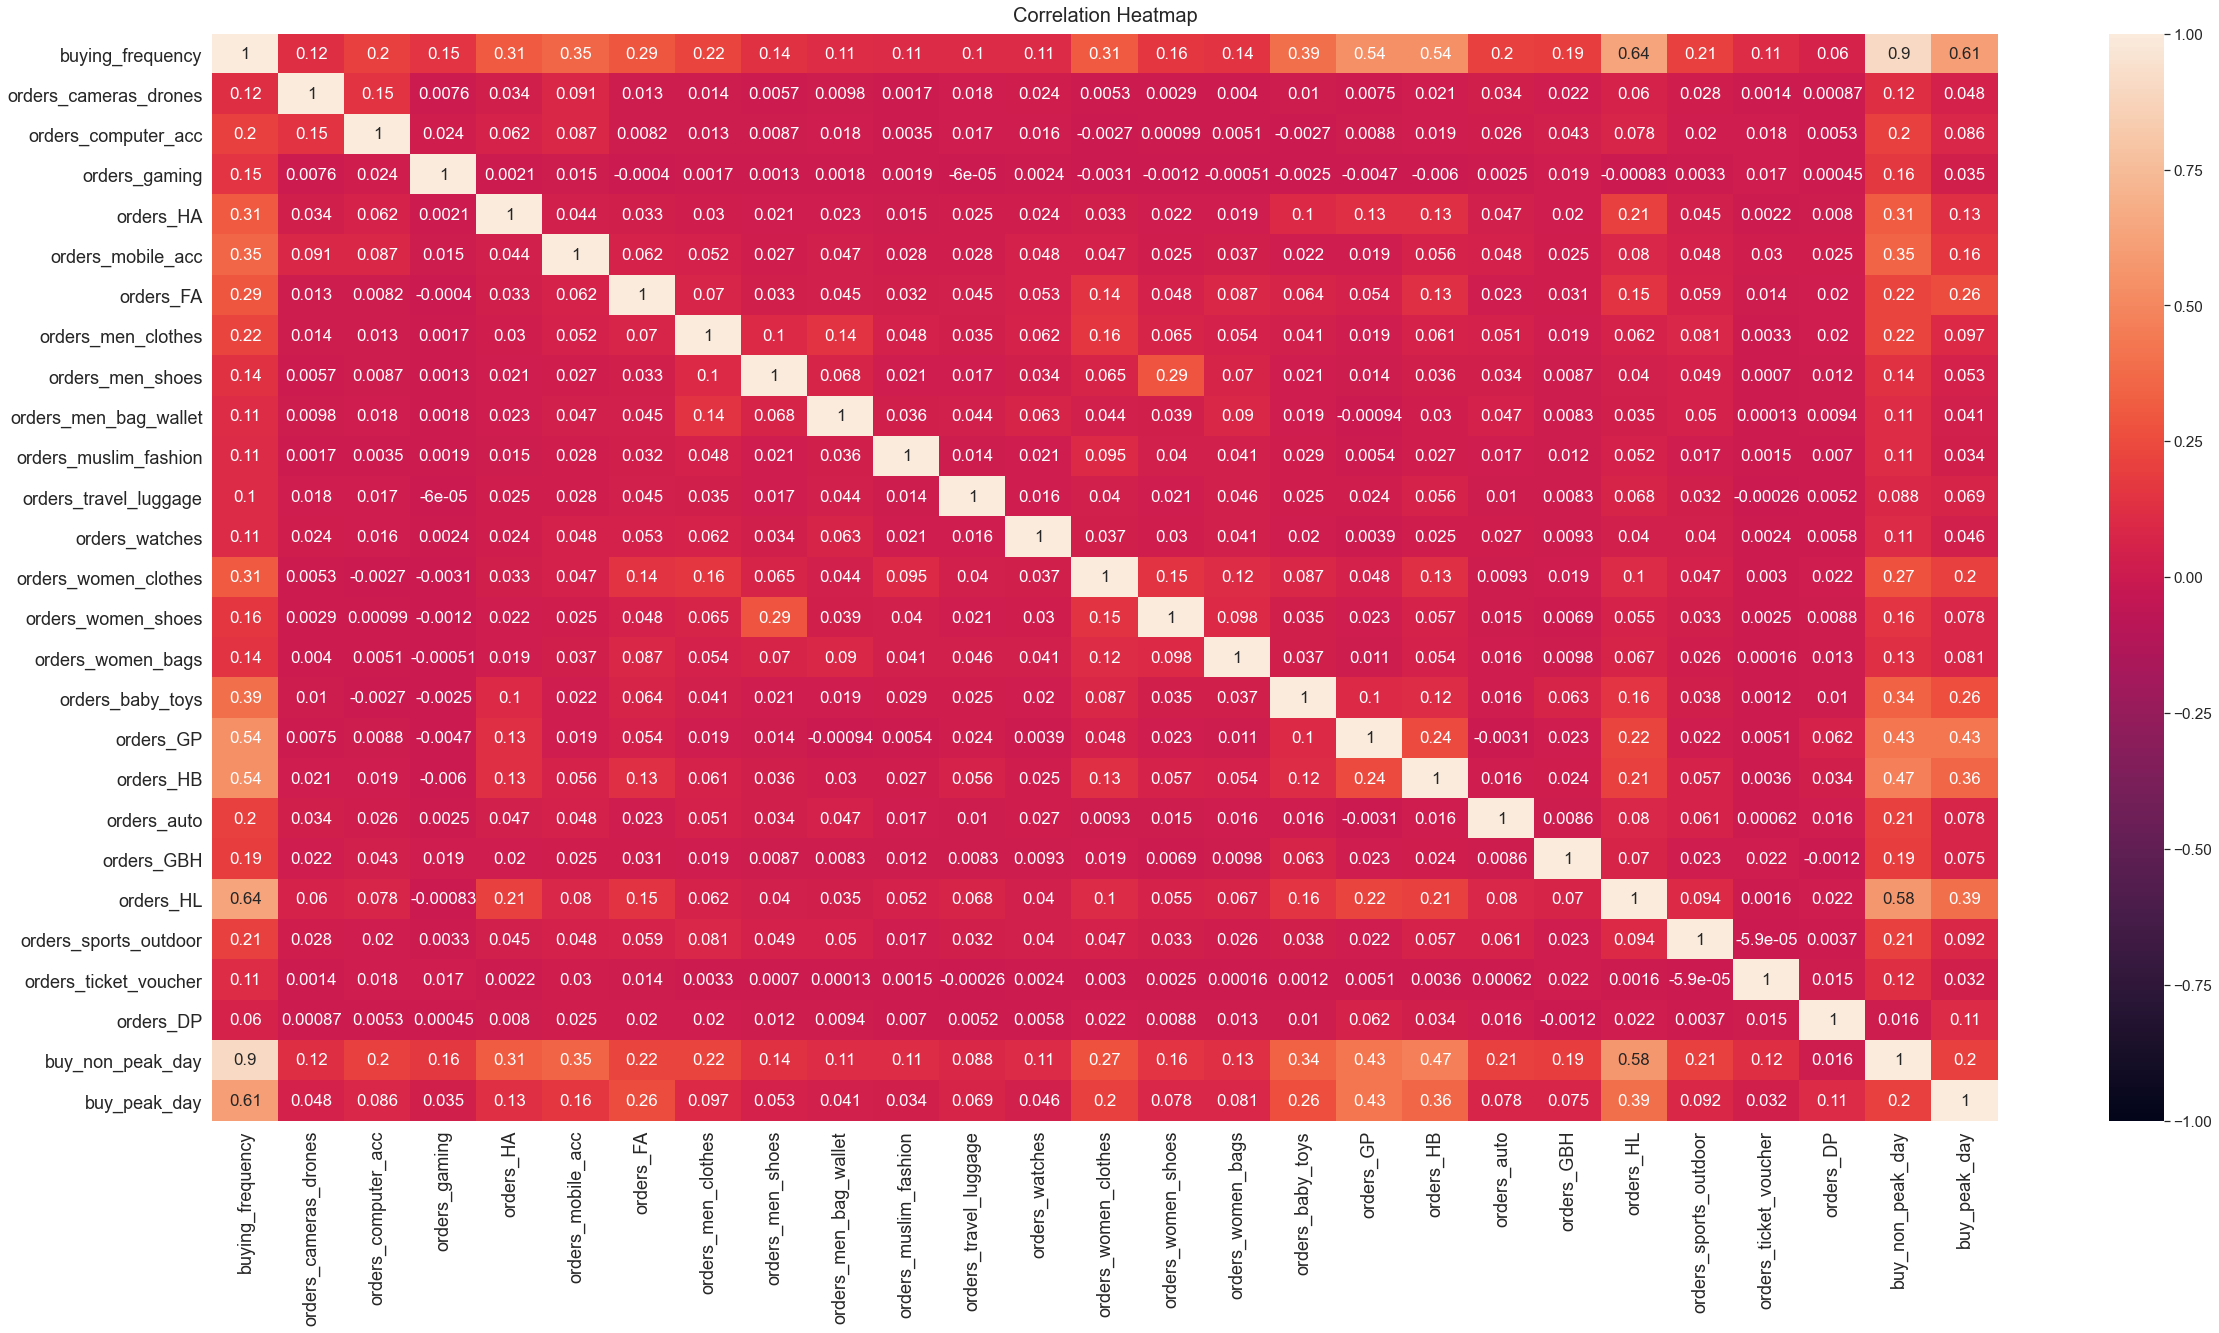

In [41]:
# Increase the size of the heatmap.
plt.figure(figsize=(40, 20))
sns.set(font_scale=1.4)

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(dataaa_ver2.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 18)
heatmap.set_yticklabels(heatmap.get_xmajorticklabels(), fontsize = 18)
plt.savefig('seaborn_heatmap_ticklabels_font_size_04.png')   

In [42]:
dataaa_ver3 = df[['buying_frequency', 'login_count', 'microsite_collect_coin']]

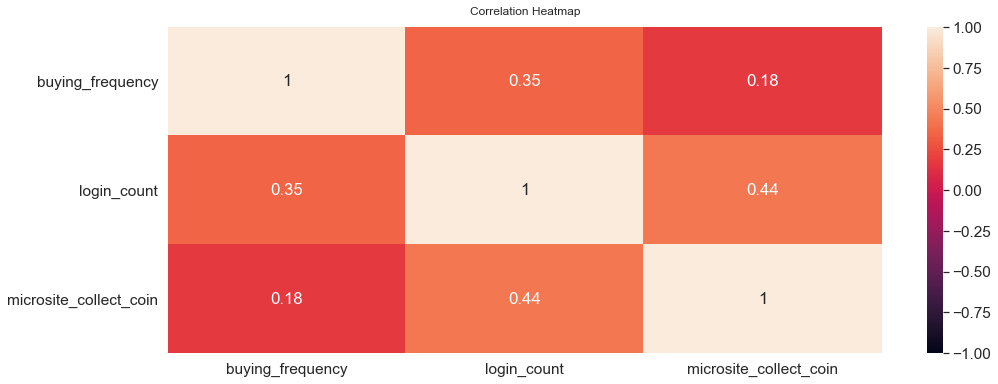

In [43]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(dataaa_ver3.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# K-Modes

In [ ]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Building the model with 4 clusters (10% sample size)
from kmodes.kmodes import KModes
km_cao  = KModes(n_clusters=4, init = "Cao", max_iter = 20, verbose=2).fit_predict(data2)

# K-Medoids

In [ ]:
def Kmedoids(df):
    from sklearn_extra.cluster import KMedoids
    from sklearn.metrics import silhouette_score,silhouette_samples
    start = time.time()
    df_kmedoids = df.copy()
    logger.info("Starting K-MEDOIDS clustering...")
    # compute K-MEDOIDS clustering
    clusters = KMedoids(n_clusters=2,random_state=0).fit_predict(df_kmedoids)
    end = time.time()
    logger.info("...K-Medoids clustering has finished!")
    logger.info("Time taken for K-MEDOIDS clustering is "+str(end-start)+" seconds.")
    # use silhouette score to evaluate the clustering result
    silhouette_avg = silhouette_score(df_kmedoids,clusters)
    print(silhouette_avg)
    silhouette_values = silhouette_samples(df_kmedoids,clusters)
    for i in range(2):
        j = silhouette_values[clusters==i]
        print(np.mean(j))
    # using the Silhouette Width to find the number of cluster
    cost =[]
    K = range(2,5)
    for num_clusters in list(K):
        clusters = KMedoids(n_clusters=num_clusters,random_state=0).fit_predict(df_kmedoids)
        silhouette_avg = silhouette_score(df_kmedoids,clusters)
        cost.append(silhouette_avg)
    plt.plot(K, cost)
    plt.title('Silhoute Score')
    plt.xlabel('Number of clusters')
    plt.ylabel('cost')
    plt.show()
    # append the clustering result into the relevant data frame
    df_kmedoids.insert(0,"Clusters",clusters,True)
    print(df_kmedoids.head(100))
    return df_kmedoids

def collect_result2(result):
    global kmedoids
    kmedoids = kmedoids.append(kmedoids,result)

In [ ]:
if __name__ == "__main__":
    import multiprocessing as mp
    from multiprocessing.pool import ThreadPool as Pool

    # LABEL ENCODING FOR CATEGORICAL DATAS 
    datatype = df.dtypes
    for i,j in enumerate (datatype):
        if j == 'object':
            df[df.columns[i]] = df[df.columns[i]].astype('category')
            df[df.columns[i]] = df[df.columns[i]].cat.codes
    df.set_index(df.columns[0])
    print(df.head(10))
    Kmedoids(df)

#     with Pool(10) as pool:
#         pool.apply_async(Kmodes,args=(df,),callback=collect_result1)
#         pool.apply_async(Kmedoids,args=(df,),callback=collect_result2)
#         pool.close()
#         pool.join()